<a href="https://colab.research.google.com/github/AkhileshPadiyar/machine-learning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np

In [54]:
from tensorflow import keras

In [55]:
from keras.models import Model

In [56]:
from keras.layers import Dense,Flatten,Conv2D, Input

In [57]:
from keras.datasets import fashion_mnist

In [58]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [59]:
train_images, test_images = train_images/255.0, test_images/255.0

In [60]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

In [61]:
import matplotlib.pyplot as plt

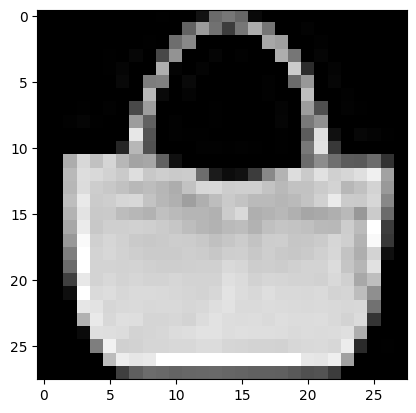

In [62]:
plt.imshow(train_images[100].reshape(28,28), cmap='gray')

In [67]:
def create_model():
  inputs = Input(shape = (28,28,1))
  x = Conv2D(32, (3,3), activation = 'relu', padding = "same")(inputs)
  x = Conv2D(64 , (3, 3), activation = 'relu', padding = 'same')(x)
  x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
  x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
  x = Flatten()(x)
  x = Dense(128, activation = 'relu')(x)
  outputs = Dense(10, activation = 'softmax')(x)

  model = Model(inputs = inputs, outputs = outputs)
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model

In [68]:
import tensorflow as tf
import time

In [69]:
def train_and_evaluate(device_name, epochs = 10):
  with tf.device(device_name):
    model = create_model()
    start_time = time.time()
    history = model.fit(train_images, train_labels, epochs = epochs, validation_data=(test_images, test_labels), verbose = 2)
    end_time = time.time()
    return history.history['accuracy'], history.history['val_accuracy'],end_time - start_time

In [ ]:
# train on cpu
cpu_acc, cpu_val_acc, cpu_time = train_and_evaluate('/CPU:0')


Epoch 1/10


In [71]:
gpu_avaliable = tf.config.list_physical_devices('GPU')
if gpu_avaliable:
  gpu_acc, gpu_val_acc, gpu_time = train_and_evaluate('/GPU:0')
else:
  gpu_acc, gpu_val_acc, gpu_time = None, None, None

In [72]:
plt.plot(cpu_acc, labels = 'Cpu Training Accuracy')
plt.plot(cpu_val_acc, labels = 'Cpu Validation Accuracy')
if gpu_acc:
  plt.plot(gpu_acc, labels = "Gpu Training Accuracy", linestyle = 'dashed')
  plt.plot(gpu_val_acc, labels = "Gpu Validation Accuracy", linestyle = 'dashed')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'cpu_acc' is not defined

In [ ]:
print(f'cpu time : {cpu_time: .2f} seconds')
print(f'gpu time: {gpu_time: .2f} seconds')